## Log data munging and EDA

Just getting set up, testing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
import sys
sys.path.insert(0,'../')

import mysticbit
from mysticbit import munging, ml, plots

Do you really want to drill me?
Do you really want to make me cry
AH AH AH AH


In [12]:
df_logs = munging.load_log_data()

df_ml = munging.create_ml_dataframe(df_logs)

df_ml_train, df_ml_test = ml.train_test_split(df_ml)

Train well:  {'G12', 'G070', 'B12', 'B14', 'G09', 'G10', 'B200', 'G06', 'B13', 'G16', 'B0700', 'G08', 'B08', 'G17', 'G15'}
Test wells:  {'B03', 'B05', 'B06'}


In [13]:
X_cols = [c for c in df_ml_train.columns if 'lag' in c]
y_cols = [c for c in df_ml_train.columns if 'futr' in c]

print('X cols: ', X_cols)
print('y cols: ', y_cols)

X cols:  ['GR_lag_0', 'GR_lag_2', 'GR_lag_4', 'GR_lag_6', 'GR_lag_8', 'GR_lag_10', 'GR_lag_12', 'GR_lag_14', 'GR_lag_16', 'GR_lag_18', 'GR_lag_20', 'GR_lag_22', 'GR_lag_24', 'GR_lag_26', 'GR_lag_28', 'GR_lag_30', 'GR_lag_32', 'GR_lag_34', 'GR_lag_36', 'GR_lag_38', 'GR_lag_40', 'GR_lag_42', 'GR_lag_44', 'GR_lag_46', 'GR_lag_48']
y cols:  ['GR_futr_2', 'GR_futr_4', 'GR_futr_6', 'GR_futr_8', 'GR_futr_10']


In [14]:
models = ml.make_multiple_models(df_ml_train, X_cols, y_cols)

In [15]:
df_pred = ml.make_predictions(models, df_ml, X_cols, y_cols)

In [16]:
df_pred.head()

,TVDSS,GR,HACKANAME,RES_ID,GR_lag_0,GR_lag_2,GR_lag_4,GR_lag_6,GR_lag_8,GR_lag_10,...,GR_futr_2_pred_base,GR_futr_4_pred_base,GR_futr_6_pred_base,GR_futr_8_pred_base,GR_futr_10_pred_base,GR_futr_2_pred_low,GR_futr_4_pred_low,GR_futr_6_pred_low,GR_futr_8_pred_low,GR_futr_10_pred_low
411,1648.2,35.110,B03,2900.0,35.110,41.880,47.58,49.46,58.89,66.12,...,37.509070,39.400044,41.678567,46.768620,43.208771,34.699238,35.155859,34.408003,35.805192,33.184242
412,1648.4,35.364,B03,2900.0,35.364,37.480,44.26,51.80,48.44,63.61,...,37.509070,39.400044,41.913200,45.287007,42.765692,33.805844,36.677698,36.699332,37.444960,34.839224
413,1648.6,35.618,B03,2900.0,35.618,35.110,41.88,47.58,49.46,58.89,...,37.509070,38.913130,41.303017,41.008949,41.845247,35.256481,35.728316,34.949145,35.064803,33.903170
414,1648.8,35.872,B03,2900.0,35.872,35.364,37.48,44.26,51.80,48.44,...,37.509070,38.913130,39.131533,41.583942,39.585213,35.793339,35.751016,36.185952,35.064803,34.294933
415,1649.0,36.126,B03,2900.0,36.126,35.618,35.11,41.88,47.58,49.46,...,36.342807,37.248687,38.759783,41.718189,41.059543,35.462738,34.723550,35.874172,34.356628,34.727432


In [17]:
well_name = 'B03'
bit_depth = 1655.0
tol = 50

In [18]:
predictions = munging.get_log_predictions(df_pred, well_name, bit_depth)

predictions.head()

,HACKANAME,TVDSS_bit_depth,pred_col,value,offset,log_name,model_name,TVDSS
0,B03,1654.0,GR_futr_2_pred_high,55.958268,2.0,GR,high,1656.0
1,B03,1654.0,GR_futr_4_pred_high,64.518913,4.0,GR,high,1658.0
2,B03,1654.0,GR_futr_6_pred_high,66.636413,6.0,GR,high,1660.0
3,B03,1654.0,GR_futr_8_pred_high,66.721493,8.0,GR,high,1662.0
4,B03,1654.0,GR_futr_10_pred_high,68.861481,10.0,GR,high,1664.0


In [19]:
def f(x):
    return x

interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [20]:
def plot_predictions(df_logs, df_pred, well_name, bit_depth):
    try:
        f, ax = plots.make_log_plot(df_logs, well_name, cols=['GR', 'RHOB'])
        predictions = munging.get_log_predictions(df_pred, well_name, bit_depth)
        
        plots.add_predictions(ax[0], predictions)
        
        #for axs in ax:
            #axs.set_ylim(1800, 1760)
        plt.show()
        
        print('updated')
        
    except AssertionError:
        #f, ax = plots.make_log_plot(df_logs, well_name)
        print('no predictions found at this depth in this well')


interact(plot_predictions, df_logs=fixed(df_logs), df_pred=fixed(df_pred),
         well_name=fixed(well_name), bit_depth=(bit_depth-20, bit_depth+20, 1));

interactive(children=(FloatSlider(value=1655.0, description='bit_depth', max=1675.0, min=1635.0, step=1.0), Ou…

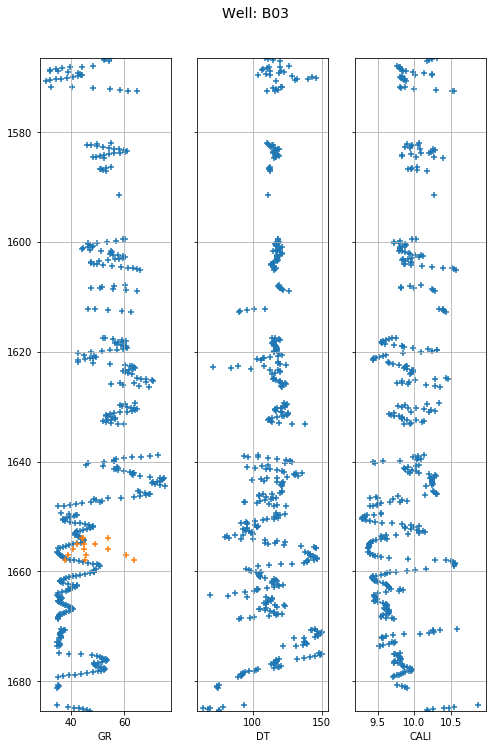

In [23]:
f, ax = plots.make_log_plot(df_logs, 'B03')
ax[0].scatter(predictions['value'], predictions['TVDSS'], marker='+')